# Data Science in Engineering
## Semesteraufgabe SoSe 2023
### Aufgabe 1: Glanzoptimierung
#### Gruppe E

| Name              | Matrik No. |
|-------------------|:------------:|
| Renuka Gajralwar  |     478030 |
| Saikiran Joshi    |     477890 |
| Hithesh Karanam   |     478001 |
| Taher Muhammedali |   478012   |

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
import warnings
from warnings import simplefilter

from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA

---

## Import Dataset

In [2]:
# Importing  data

df = pd.read_excel('Aufgabe_1_Gloss_Optimization.xlsx')
print(f"Number of observations in the Gloss Dataset is {df.shape[0]}.")
print(f"Number of features in the Gloss Dataset is {df.shape[1]-1}.")
df.head()

Number of observations in the Gloss Dataset is 58.
Number of features in the Gloss Dataset is 14.


,V13,V15,V16,V18,V19,V21,V28,V29,V30,V31,V32,V33,V34,V39,gloss
0,0.10,HMW 1,0.05,LMW 1,0.05,LMW 6,-0.004681,0.103880,0.000972,-0.005881,0.055534,0.058750,-0.004681,8,6200
1,0.12,HMW 1,0.04,LMW 1,0.04,LMW 6,-0.010345,0.112653,0.001479,0.005503,0.040954,0.056777,-0.010345,8,6400
2,0.12,HMW 1,0.06,LMW 1,0.02,LMW 6,-0.005359,0.125634,0.003815,-0.012599,0.074109,0.015341,-0.005359,8,5800
3,0.14,HMW 1,0.04,LMW 1,0.02,LMW 6,-0.004240,0.147946,-0.016650,0.010005,0.039433,0.018663,-0.004240,6,6200
4,0.28,HMW 1,0.08,LMW 1,0.04,LMW 6,-0.026882,0.284841,-0.009568,-0.019216,0.068883,0.038201,-0.026882,8,8600


Overview of the Gloss Dataset

---

## Correlation Analysis

In [3]:
#Here we will perform two correlation analysis, Pearson & Spearman

# removing FutureWarning generated from correlation formulas
warnings.simplefilter(action='ignore', category=FutureWarning)

#Checking the relationship between the variables of the given dataset

# Finding the Pearson correlation of the dataset
df_pears = df.corr(method='pearson')

# Finding the Spearman correlation of the dataset
df_spear = df.corr(method='spearman')

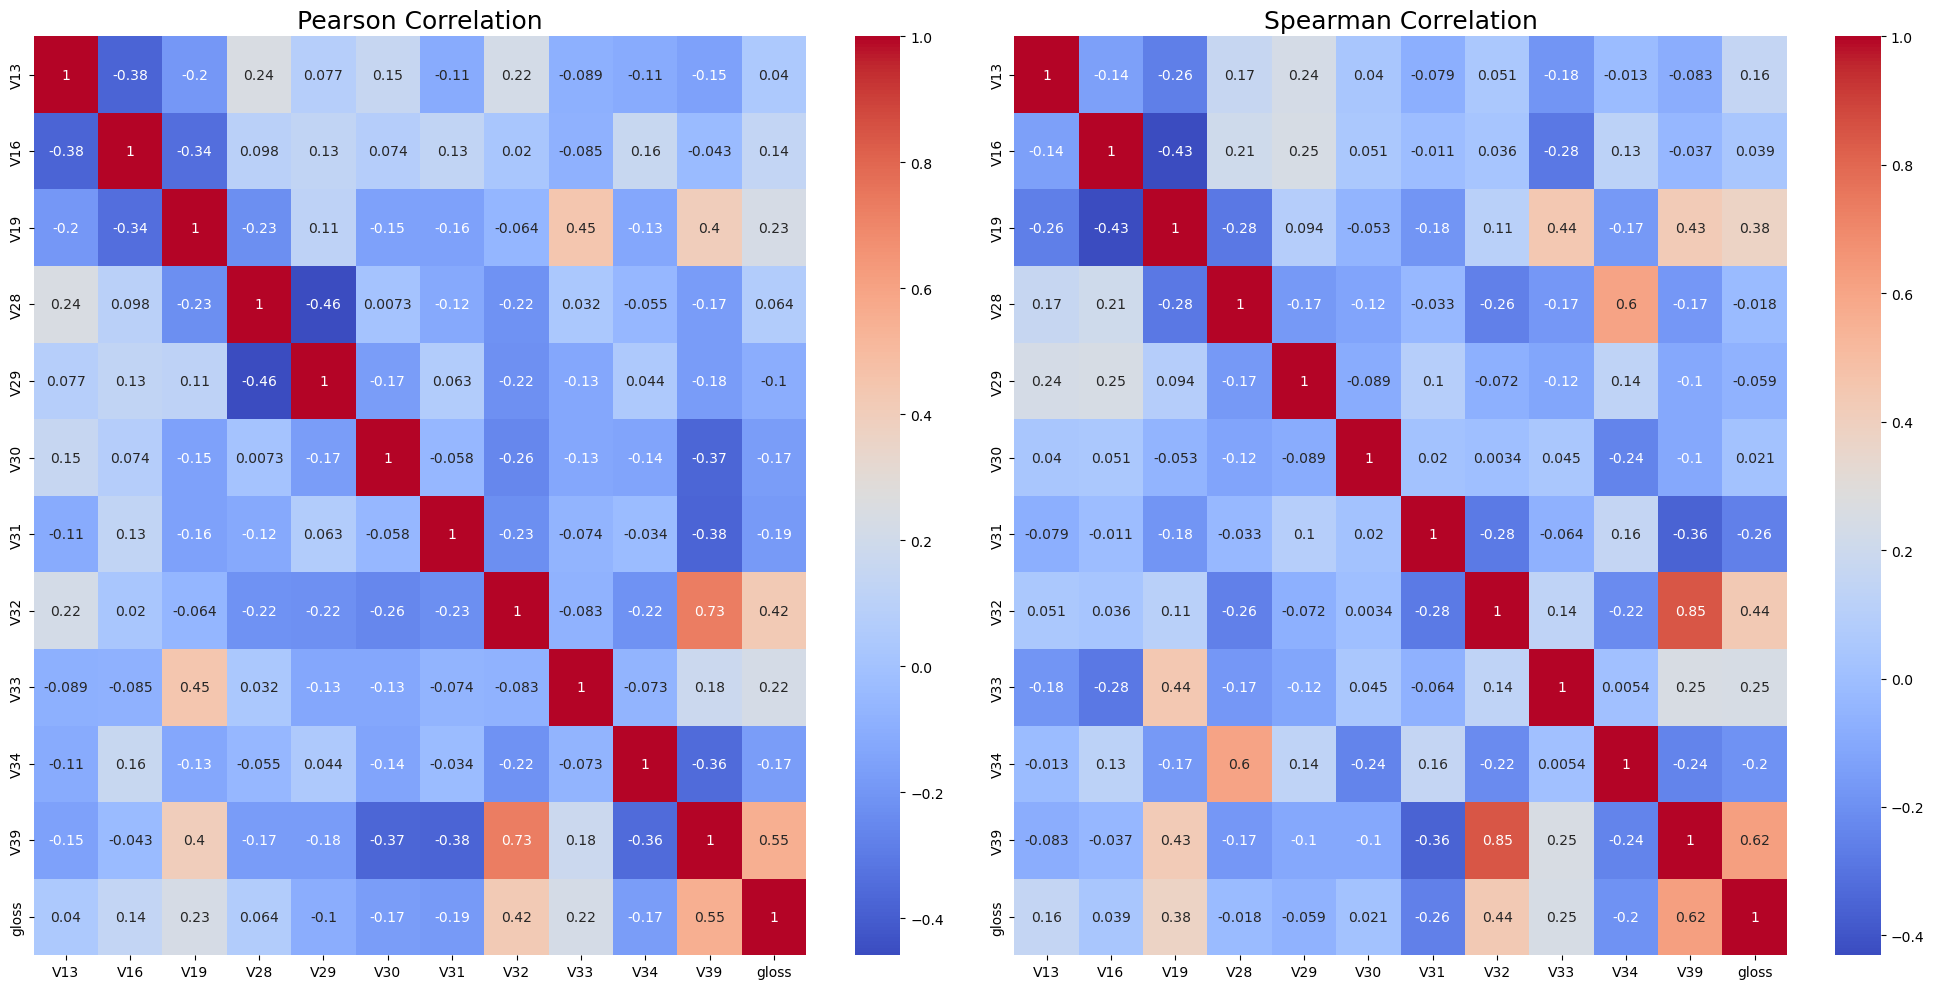

In [4]:
#Plotting both Correlation analysis to visualize and analyse correlation within the gloss dataset

plt.figure(figsize=(20, 10))

# Subplot for Pearson correlation
#Pearson correlation gives the linear realtionship between the variables
plt.subplot(1, 2, 1)
sns.heatmap(df_pears, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation', fontsize=18, y=1)


# Subplot for Spearman correlation
#Spearman correlation gives the monotonous realtionship (non-linear) between the variables
plt.subplot(1, 2, 2)
sns.heatmap(df_spear, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation', fontsize=18, y=1)

plt.tight_layout()
plt.show()

<b>Pearson Correlation Observation</b>
- Here we can observe that features <i>V32 and V39</i> are showing medium-strong correlation to our target <i>gloss</i>, <i>0.42 & 0.55</i> respectively.
- Subsequently, we can also observe that both <i>V32 and V39</i> are strongly correlated as per this correlation method with a strong correlation value of 0.73

<b>Spearman Correlation Observation</b>
- Spearman also reinforces the observations above from Pearson, for features <i>V32 and V39</i>.
- Additionally, we can observe a medium correlation of feature <i>V19</i> with our target <i>gloss</i>

Note - Non-numeric features such as <i>V15, V18 and V21</i> are not considered in the above correlation analysis

---

## Outlier Analysis

In [5]:
# This cell calculates zscores for each column, feature and target and idetifies outliers above a certain predfined threshold.
# Indices of all the rows where an outlier value exists, will then be extracted. A for loop will perform an analysis on all feature columns 

# Create an array using np.arange
original_array = np.arange(df.shape[1])

# Values to be removed
values_to_remove = [i for i,col in enumerate (df.columns) if df[col].dtype=='object'] # Categorical columns

# Remove specified values using set differences
filtered_array = np.setdiff1d(original_array, values_to_remove)

# Define a threshold for outlier detection (e.g., 2 or 3)
threshold = 2.5
outlierlist = []

for i in filtered_array:
    # Create a sample dataset (replace this with your actual data)
    data = df.iloc[:,i]

    # Calculate Z-Scores
    z_scores = zscore(data)
    
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    outlierlist = outlierlist + [item for item in outliers if item not in outlierlist]

values = df.iloc[outliers]
print("Indices of outliers:", outliers)
values

Indices of outliers: [37 38 40]


,V13,V15,V16,V18,V19,V21,V28,V29,V30,V31,V32,V33,V34,V39,gloss
37,0.2,LMW 3,0.2,HMW 4,0.0,NaN,0.007180,0.215330,-0.002961,0.025634,0.201124,0.014473,0.007180,8,11800
38,0.2,LMW 3,0.2,HMW 1,0.0,NaN,0.031322,0.195481,0.008419,0.006735,0.183201,0.006038,0.031322,8,13600
40,0.2,LMW 3,0.2,HMW 6,0.0,NaN,0.199251,-0.002632,-0.001479,-0.001118,0.189497,-0.000656,-0.000749,8,13400


In [6]:
df2 = df.copy()
df2 = df2.drop(outliers).reset_index(drop=True)
print(f"Number of observations in the Gloss Dataset without outliers is {df2.shape[0]}.")
print(f"Number of features in the Gloss Dataset without outliers is {df2.shape[1]-1}.")

Number of observations in the Gloss Dataset without outliers is 55.
Number of features in the Gloss Dataset without outliers is 14.


Above analysis has provided us with 3 outliers in the raw dataset.

Now we will do a basic R2 and RMSE analysis using OLS on the whole dataset to see if removing the identified outliers have a significant improvement on R2 and RMSE

In [7]:
# Creating a custom function to perform OneHotEncoder and ColumnTransformation together.

def encoder_transformer(df):
    
    # Define features and target seperately 
    X = df.drop('gloss',axis=1) # Here X is our list of features
    y = df['gloss'] # Here y is our target, gloss

    # Finding column index where features are non-numeric
    string_col_indices = [i for i,col in enumerate (X.columns) if X[col].dtype=='object']

    # Using OneHotEncoder & ColumnTransformer to transform string indices
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),string_col_indices )], remainder='passthrough')
    X = np.array(ct.fit_transform(X)).astype('float64')
    print(f"After encoder & column transformation, the original dataframe has changed from {df.shape} to an array of {X.shape}")
    
    # # Creating a list with all feature names after column transformation
    # name_list = ct.get_feature_names()
    # name_list.insert(0, "const") # Manually adding a string of "const" to list of names
    
    # X = sm.add_constant(X)
    # X_df = pd.DataFrame(X, columns=name_list)
    
    return X, y

In [8]:
X_all, y_all = encoder_transformer(df)
X_all = sm.add_constant(X_all)

ols_reg = sm.OLS(y_all, X_all).fit()

y_pred_all = ols_reg.predict(X_all)
rmse_all = mean_squared_error(y_all, y_pred_all, squared=False)
r2_all = r2_score(y_all, y_pred_all)
print("\nMit outliers: \nRMSE:", rmse_all)
print("R2:", r2_all)

After encoder & column transformation, the original dataframe has changed from (58, 15) to an array of (58, 35)

Mit outliers: 
RMSE: 512.4605650607036
R2: 0.9523156088599594


In [9]:
X_ohne, y_ohne = encoder_transformer(df2)
X_ohne = sm.add_constant(X_ohne)

ols_reg2 = sm.OLS(y_ohne, X_ohne).fit()

y_pred_ohne = ols_reg2.predict(X_ohne)
rmse_ohne = mean_squared_error(y_ohne, y_pred_ohne, squared=False)
r2_ohne = r2_score(y_ohne, y_pred_ohne)
print("\nOhne outliers: \nRMSE:", rmse_ohne)
print("R2:", r2_ohne)

After encoder & column transformation, the original dataframe has changed from (55, 15) to an array of (55, 35)

Ohne outliers: 
RMSE: 288.2639617651816
R2: 0.9702168356170614


- R2 - Here we can note that R2 fit of the dataset ohne outliers is closer to 1
- RMSE - Here we can see a drastic improvement as the RMSE halves in the dataset ohne outliers, from 512 to 288

So for further analysis we will consider 55 observations of the dataset and ignore the 3 observations for now which were identified as outliers due to very high gloss values compared to the rest of the dataset in order to provide a better training dataset for our models.

---

## PCA

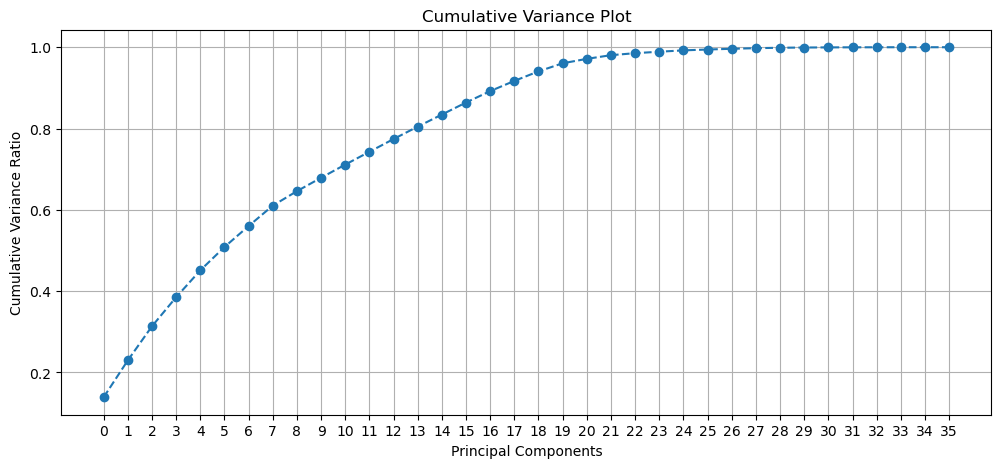

In [10]:
scaler = StandardScaler()
X_ohne1 = scaler.fit_transform(X_ohne)

# PCA for analysis
pca = PCA()
pca.fit(X_ohne1)

# Calculation and Plotting Explained Variances
explained_variance = pca.explained_variance_ratio_

# Calculating and Plotting Cumulative Variances
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 5))
plt.plot(range(len(cumulative_variance)), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Plot')
plt.xticks(range(len(cumulative_variance)))
plt.grid(True)
plt.show()

From the above PCA we can see that the first 18 PCs explain more than 90% of the variance. This means that we can almost half the number of features for our model analysis as most of the variance is covered with the first 18 PCs

---

### Transforming and Splitting the Dataset

In [11]:
#Transforming df2 to an array
X, y = encoder_transformer(df2)

# Since we only have 55 observations, it would be better to train the model on the basis of a siginificant training split of dataset for accurate predictions
# Here we are using sklearn train_test_split to split the data using a pre-assigned random state in order to get consistent results at every run

# Split the data into 90% training and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

After encoder & column transformation, the original dataframe has changed from (55, 15) to an array of (55, 35)


In [12]:
#Transforming df to an array
X_o, y_o = encoder_transformer(df)  #data including outliers



# Split the data into 90% training and 10% test
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.1, random_state=42)

After encoder & column transformation, the original dataframe has changed from (58, 15) to an array of (58, 35)


### Scalar transformation of X

It's generally recommended to fit the scaler on the training data only, and then use the same scaler to transform both the training and test data separately.

#### With Outliers

In [13]:
# define scaler object 
sc = StandardScaler()
# fit scaler based on training data and transform training data 
X_train_sc_o = sc.fit_transform(X_train_o)
# scale test data
X_test_sc_o = sc.transform(X_test_o)

#### Without Outliers

In [14]:
# define scaler object
sc = StandardScaler()
# fit scaler based on training data and transform training data
X_train_sc = sc.fit_transform(X_train)
# scale test data
X_test_sc = sc.transform(X_test)

---

## Linear Regression

#### With Outliers

In [15]:
# Define the regressor and perform the fit based on the scaled training data
linear_reg = LinearRegression()
linear_reg.fit(X_train_sc_o, y_train_o)

# Predict based on the features for both testing and training data
y_pred_train_linear_o = linear_reg.predict(X_train_sc_o) # Predicting y for training data. This is expected to have a good fit as the model is trained using this dataset.
y_pred_test_linear_o = linear_reg.predict(X_test_sc_o)  # predicting y for testing data

# Print the metrics R2 and RMSE for both training and testing data
print(f'Train metrics: R2: {r2_score(y_train_o, y_pred_train_linear_o)}, RMSE: {mean_squared_error(y_train_o, y_pred_train_linear_o, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test_o, y_pred_test_linear_o)}, RMSE: {mean_squared_error(y_test_o, y_pred_test_linear_o, squared=False)}')

Train metrics: R2: 0.9597506729743016, RMSE: 483.45703012637154
Test metrics: R2: 0.49237437999236133, RMSE: 1167.4047209960395


#### Without Outliers

In [16]:
# Define the regressor and perform the fit based on the scaled training data
linear_reg = LinearRegression()
linear_reg.fit(X_train_sc, y_train)

# Predict based on the features for both testing and training data
y_pred_train_linear = linear_reg.predict(X_train_sc) # Predicting y for training data. This is expected to have a good fit as the model is trained using this dataset.
y_pred_test_linear = linear_reg.predict(X_test_sc)  # predicting y for testing data

# Calculate RMSE for training and testing data
rmse_train_linear = mean_squared_error(y_train, y_pred_train_linear, squared=False)
rmse_test_linear = mean_squared_error(y_test, y_pred_test_linear, squared=False)

# Print the metrics R2 and RMSE for both training and testing data
print(f'Train metrics: R2: {r2_score(y_train, y_pred_train_linear)}, RMSE: {mean_squared_error(y_train, y_pred_train_linear, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test, y_pred_test_linear)}, RMSE: {mean_squared_error(y_test, y_pred_test_linear, squared=False)}')

Train metrics: R2: 0.9838787977490538, RMSE: 213.65246437403368
Test metrics: R2: 0.6158359142078269, RMSE: 957.5341341647581


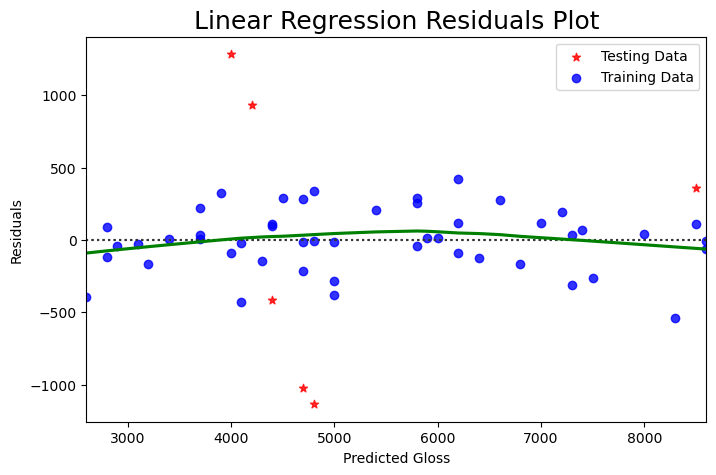

In [17]:
#Residuals Plot for Linear Regression
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred_test_linear, label='Testing Data', scatter_kws={"marker": "*", "color": "red"}) #Plotting testing data
sns.residplot(x=y_train, y=y_pred_train_linear, lowess=True, line_kws={"color":"g"}, label='Training Data', scatter_kws={"marker": "o", "color": "blue"}) #Plotting training data using lowess
plt.legend()
plt.xlabel('Predicted Gloss')
plt.ylabel('Residuals')
plt.title("Linear Regression Residuals Plot", fontsize=18)
plt.show()

<b>Linear Regression Observation</b>

- Better fit is obtained for the data without outliers 
- As expected, predicted y values based on training data shows a healthy fit with R2 ≈ 1
- However, the prediction of y values based on test data shows a poor fit with R2 ≈ 0.6
- The RMSE for testing data being significantly higher than that of training data also shows that errors are also larger for testing data

From this we can possibly conclude that Linear Regression has not turned out to be good model for our dataset.

---

## OLS

#### Without Outliers

In [18]:
import statsmodels.api as sm

# Fit the OLS model using training data
ols_model = sm.OLS(y_train, X_train).fit()

# Predict based on the features for both testing and training data
y_pred_train_ols = ols_model.predict(X_train)
y_pred_test_ols = ols_model.predict(X_test)

# Print the metrics (R2 and RMSE) for both training and testing data
r2_train_ols = ols_model.rsquared
r2_test_ols = r2_score(y_test, y_pred_test_ols)
rmse_train_ols = mean_squared_error(y_train, y_pred_train_ols, squared=False)
rmse_test_ols = mean_squared_error(y_test, y_pred_test_ols, squared=False)

print(f'OLS Train R2: {r2_train_ols:.4f}')
print(f'OLS Test R2: {r2_test_ols:.4f}')
print(f'OLS Train RMSE: {rmse_train_ols:.4f}')
print(f'OLS Test RMSE: {rmse_test_ols:.4f}')



OLS Train R2: 0.9985
OLS Test R2: 0.6167
OLS Train RMSE: 215.5793
OLS Test RMSE: 956.4675


#### With Outliers

In [19]:
import statsmodels.api as sm

# Fit the OLS model using training data
ols_model_o = sm.OLS(y_train_o, X_train_o).fit()

# Predict based on the features for both testing and training data
y_pred_train_ols_o = ols_model_o.predict(X_train_o)
y_pred_test_ols_o = ols_model_o.predict(X_test_o)

# Print the metrics (R2 and RMSE) for both training and testing data
r2_train_ols_o = ols_model_o.rsquared
r2_test_ols_o = r2_score(y_test_o, y_pred_test_ols_o)
rmse_train_ols = mean_squared_error(y_train_o, y_pred_train_ols_o, squared=False)
rmse_test_ols = mean_squared_error(y_test, y_pred_test_ols_o, squared=False)

print(f'OLS Train R2: {r2_train_ols:.4f}')
print(f'OLS Test R2: {r2_test_ols:.4f}')
print(f'OLS Train RMSE: {rmse_train_ols:.4f}')
print(f'OLS Test RMSE: {rmse_test_ols:.4f}')

OLS Train R2: 0.9985
OLS Test R2: 0.6167
OLS Train RMSE: 495.5057
OLS Test RMSE: 1583.3890


The influence of outliers is clearly evident on the fit. Without the outliers, a better fit is obtained which can be validated by the lower RMSE values for both train and test data.

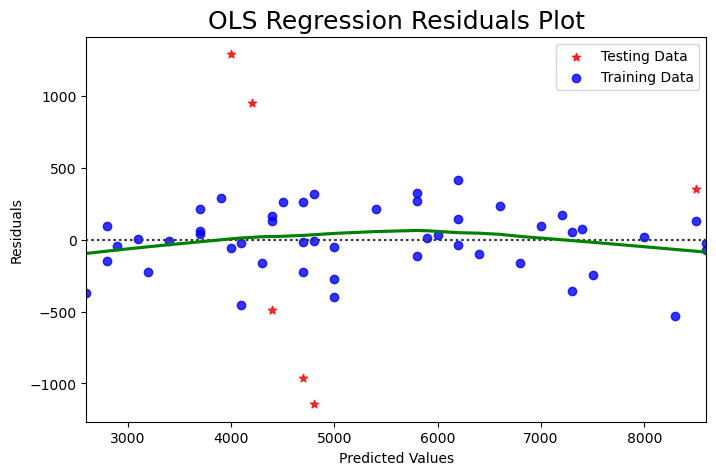

                                 OLS Regression Results                                
Dep. Variable:                  gloss   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              272.1
Date:                Thu, 31 Aug 2023   Prob (F-statistic):                    4.20e-15
Time:                        22:09:56   Log-Likelihood:                         -332.82
No. Observations:                  49   AIC:                                      735.6
Df Residuals:                      14   BIC:                                      801.9
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
# Residuals Plot for OLS Regression without outliers
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred_test_ols, label='Testing Data', scatter_kws={"marker": "*", "color": "red"}) # Plotting testing data
sns.residplot(x=y_train, y=y_pred_train_ols, lowess=True, line_kws={"color":"g"}, label='Training Data', scatter_kws={"marker": "o", "color": "blue"}) # Plotting training data using lowess
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title("OLS Regression Residuals Plot", fontsize=18)
plt.show()

# Print the summary of the OLS regression without the outliers
print(ols_model.summary())


<b>OLS Regression Observation</b>

- As expected, predicted y values based on training data shows a healthy fit with R2 ≈ 1
- However, the prediction of y values based on test data shows a poor fit with R2 ≈ 0.5
- The RMSE for testing data being significantly higher than that of training data also shows that errors are larger for testing data
- The residual plots of Linear and OLS regression are exactly the same.

From this we can possibly conclude that OLS regression model just like Linear regression has not turned out to be good model for our dataset.

---


## Lasso Regression

#### With outliers

In [21]:
#Suppressing Convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

#Defining alpha range for Lasso regression
alphas = np.logspace(-5, 100, 1000)  
lassocv_reg = LassoCV(alphas=alphas, cv=5, max_iter=10000) #cross validation = 5

# Fitting the lasso regressor model based on training data
lassocv_reg.fit(X_train_sc_o, y_train_o)

# Predicting y values based on training and testing data
y_pred_test_lasso_o = lassocv_reg.predict(X_test_sc_o)
y_pred_train_lasso_o = lassocv_reg.predict(X_train_sc_o)


# Calculate RMSE for training and testing data
rmse_train_lasso_o = mean_squared_error(y_train_o, y_pred_train_lasso_o, squared=False)
rmse_test_lasso_o = mean_squared_error(y_test_o, y_pred_test_lasso_o, squared=False)

# Print RMSE values
print(f'Train RMSE: {rmse_train_lasso_o}')
print(f'Test RMSE: {rmse_test_lasso_o}\n')
# Get the best alpha value
best_alpha_o = lassocv_reg.alpha_
print(f"Best Alpha: {best_alpha_o}")

Train RMSE: 555.2395988455995
Test RMSE: 1082.4410930261538

Best Alpha: 20.24446509976806


#### Without outliers

In [22]:
#Suppressing Convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

#Defining alpha range for Lasso regression
alphas = np.logspace(-3, 3, 1000)  
lassocv_reg = LassoCV(alphas=alphas, cv=5   , max_iter=10000) #cross validation = 5

# Fitting the lasso regressor model based on training data
lassocv_reg.fit(X_train_sc, y_train)

# Predicting y values based on training and testing data
y_pred_test_lasso = lassocv_reg.predict(X_test_sc)
y_pred_train_lasso = lassocv_reg.predict(X_train_sc)

# Calculate RMSE with the best alpha
print(f'Train metrics: R2: {r2_score(y_train, y_pred_train_lasso)}, RMSE: {mean_squared_error(y_train, y_pred_train_lasso, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test, y_pred_test_lasso)}, RMSE: {mean_squared_error(y_test, y_pred_test_lasso, squared=False)} \n')

# Get the best alpha value
best_alpha = lassocv_reg.alpha_
print(f"Best Alpha: {best_alpha}")

Train metrics: R2: 0.9305269390572131, RMSE: 443.5242910016271
Test metrics: R2: 0.7689781614352489, RMSE: 742.5443565030571 

Best Alpha: 50.431594871713585


<b>Lasso Regression Observation</b>

- As expected, again the predicted y values based on training data shows a healthy fit with R2 ≈ 1 for Lasso regression model
- The prediction of y values based on test data shows a poor fit with R2 ≈ 0.6. However, this is still a better fit in comparison to Linear Regression model.
- The RMSE for testing is also in Lasso's case significantly higher than that of training data
- Linear Regressor performed slightly better than Lasso on training data with better R2 and lower RMSE values, however Lasso had a slightly better prediction for training dataset

From this we can possibly conclude that Lasso Regression is also not a good model for our dataset.

---

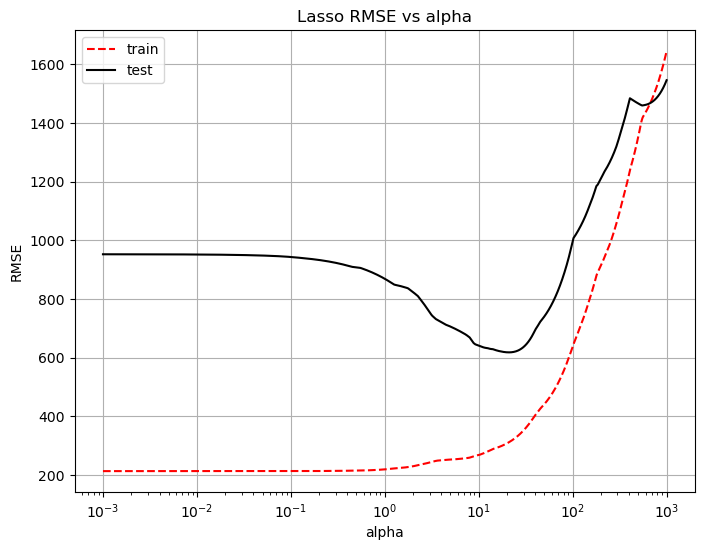

In [23]:
# define results dicts and lists
rmse = {'train': [], 'test': []}
pred = {'train': [], 'test': []}

# loop over defined alpha values
for a in alphas:
    # define and fit lasso regressor
    reg = Lasso(alpha=a).fit(X_train_sc, y_train)

    # predict train and testing data
    pred['test'].append(reg.predict(X_test_sc))
    pred['train'].append(reg.predict(X_train_sc))
    # Calculate RMSE
    rmse['test'].append(mean_squared_error(pred['test'][-1], y_test, squared=False))
    rmse['train'].append(mean_squared_error(pred['train'][-1], y_train, squared=False))
    
plt.figure(figsize=(8, 6))

# Plot the two lines

plt.plot(alphas, rmse['train'], '--r', label='train')
plt.plot(alphas, rmse['test'], '-k', label='test')

# Add labels and legend
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Lasso RMSE vs alpha')
plt.legend()
plt.xscale('log')

# Show the plot
plt.grid(True)
plt.show()

## Huber Regression

#### With outliers

In [24]:
# Huber hyperparameter tuning

# Huber has two tunable parameters, Epsilon is the main influential parameter, however we will also analyse effect of tuning alpha

h_epsilon_o = np.linspace(1,  2, 50) # Defining range for Epsilon values for tuning
h_alpha_o   = np.logspace(-4,  -2, 50) # Defining range for alpha values for tuning

# Create regressor model for tuning
regressor_o = HuberRegressor()

# Define the parameter grid
param_grid_o = {'epsilon': h_epsilon_o,  
              'alpha': h_alpha_o}

# Create GridSearchCV object
tuner_huber = GridSearchCV(estimator=regressor_o,
                     param_grid=param_grid_o,
                     scoring='neg_mean_squared_error',
                     cv=5,
                     return_train_score=True)

# Perform hyperparameter tuning
tuner_huber.fit(X_train_sc_o, y_train_o)


# # Get the results from the tuning
# means_train = -tuner.cv_results_['mean_train_score']
# stds_train = tuner.cv_results_['std_train_score']
# means_test = -tuner.cv_results_['mean_test_score']
# stds_test = tuner.cv_results_['std_test_score']
# params_list = tuner.cv_results_['params']

# Get the best model from cross validation
best_model_huber = tuner_huber.best_estimator_

print(f"Best Epsilon: {best_model_huber.epsilon}")
print(f"Best Alpha: {best_model_huber.alpha}")

Best Epsilon: 1.8775510204081631
Best Alpha: 0.004291934260128779


In [25]:
# Model 1 run with best epsilon and default alpha value of 0.0001

huber_model_o_1 = HuberRegressor(epsilon=best_model_huber.epsilon, max_iter=10000)
huber_model_o_1.fit(X_train_sc_o, y_train_o)
    
# Predict on the training data
y_pred_train_huber1_o = huber_model_o_1.predict(X_train_sc_o)
train_rmse_o = mean_squared_error(y_train_o, y_pred_train_huber1_o, squared=False)
    
# Predict on the testing data
y_pred_test_huber1_o = huber_model_o_1.predict(X_test_sc_o)
test_rmse_o = mean_squared_error(y_test_o, y_pred_test_huber1_o, squared=False)

print('With best Epsilon & default Alpha (Model 1)')
print(f'Train metrics: R2: {r2_score(y_train_o, y_pred_train_huber1_o)}, RMSE: {mean_squared_error(y_train_o, y_pred_train_huber1_o, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test_o, y_pred_test_huber1_o)}, RMSE: {mean_squared_error(y_test_o, y_pred_test_huber1_o, squared=False)} \n')

# Model 2 run with best epsilon and best alpha

huber_model_o_2 = HuberRegressor(epsilon=best_model_huber.epsilon, max_iter=10000, alpha=best_model_huber.alpha)
huber_model_o_2.fit(X_train_sc_o, y_train_o)
    
# Predict on the training data
y_pred_train_huber2_o = huber_model_o_2.predict(X_train_sc_o)
train_rmse_o = mean_squared_error(y_train_o, y_pred_train_huber2_o, squared=False)

# Predict on the testing data
y_pred_test_huber2_o = huber_model_o_2.predict(X_test_sc_o)
test_rmse_o = mean_squared_error(y_test_o, y_pred_test_huber2_o, squared=False)

# Calculate RMSE with the best alpha
print('With best Epsilon & best Alpha (Model 2)')
print(f'Train metrics: R2: {r2_score(y_train_o, y_pred_train_huber2_o)}, RMSE: {mean_squared_error(y_train_o, y_pred_train_huber2_o, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test_o, y_pred_test_huber2_o)}, RMSE: {mean_squared_error(y_test_o, y_pred_test_huber2_o, squared=False)} \n')

With best Epsilon & default Alpha (Model 1)
Train metrics: R2: 0.9538993307325064, RMSE: 517.4068610451916
Test metrics: R2: 0.594898256497288, RMSE: 1042.8737474127431 

With best Epsilon & best Alpha (Model 2)
Train metrics: R2: 0.9327138911183471, RMSE: 625.0881633718813
Test metrics: R2: 0.7338770606070547, RMSE: 845.2610065721344 



#### Without outliers

In [26]:
# Huber hyperparameter tuning

# Huber has two tunable parameters, Epsilon is the main influential parameter, however we will also analyse effect of tuning alpha

# Create regressor model for tuning
regressor = HuberRegressor()

# Define the parameter grid
param_grid = {'epsilon': np.linspace(1,  4, 50),  # Defining range for Epsilon values for tuning
              'alpha': np.logspace(-4,  -2, 50)}  # Defining range for alpha values for tuning

# Create GridSearchCV object
tuner_huber = GridSearchCV(estimator=regressor,
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                     cv=5,
                     return_train_score=True)

# Perform hyperparameter tuning
tuner_huber.fit(X_train_sc, y_train)

# Get the results from the tuning
means_train_huber = -tuner_huber.cv_results_['mean_train_score']
stds_train_huber = tuner_huber.cv_results_['std_train_score']
means_test_huber = -tuner_huber.cv_results_['mean_test_score']
stds_test_huber = tuner_huber.cv_results_['std_test_score']
params_list_huber = tuner_huber.cv_results_['params']

# Get the best model from cross validation
best_model_huber = tuner_huber.best_estimator_

print(f"Best Epsilon: {best_model_huber.epsilon}")
print(f"Best Alpha: {best_model_huber.alpha}")

Best Epsilon: 2.9591836734693877
Best Alpha: 0.01


In [27]:
# Model 1 run with best epsilon and default alpha value of 0.0001
huber_model_1 = HuberRegressor(epsilon=best_model_huber.epsilon, max_iter=10000)
huber_model_1.fit(X_train_sc, y_train)
    
# Predict on the training data
y_pred_train_huber1 = huber_model_1.predict(X_train_sc)
train_rmse = mean_squared_error(y_train, y_pred_train_huber1, squared=False)
    
# Predict on the testing data
y_pred_test_huber1 = huber_model_1.predict(X_test_sc)
test_rmse = mean_squared_error(y_test, y_pred_test_huber1, squared=False)

print('With best Epsilon & default Alpha (Model 1)')
print(f'Train metrics: R2: {r2_score(y_train, y_pred_train_huber1)}, RMSE: {mean_squared_error(y_train, y_pred_train_huber1, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test, y_pred_test_huber1)}, RMSE: {mean_squared_error(y_test, y_pred_test_huber1, squared=False)} \n')

# Model 2 run with best epsilon and best alpha
huber_model_2 = HuberRegressor(epsilon=best_model_huber.epsilon, max_iter=10000, alpha=best_model_huber.alpha)
huber_model_2.fit(X_train_sc, y_train)
    
# Predict on the training data
y_pred_train_huber2 = huber_model_2.predict(X_train_sc)
train_rmse = mean_squared_error(y_train, y_pred_train_huber2, squared=False)
    
# Predict on the testing data
y_pred_test_huber2 = huber_model_2.predict(X_test_sc)
test_rmse = mean_squared_error(y_test, y_pred_test_huber2, squared=False)


# Calculate RMSE with the best alpha
print('With best Epsilon & best Alpha (Model 2)')
print(f'Train metrics: R2: {r2_score(y_train, y_pred_train_huber2)}, RMSE: {mean_squared_error(y_train, y_pred_train_huber2, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test, y_pred_test_huber2)}, RMSE: {mean_squared_error(y_test, y_pred_test_huber2, squared=False)} \n')

With best Epsilon & default Alpha (Model 1)
Train metrics: R2: 0.9837483451434204, RMSE: 214.5151594513276
Test metrics: R2: 0.6397558718737267, RMSE: 927.244656205347 

With best Epsilon & best Alpha (Model 2)
Train metrics: R2: 0.9634517731957049, RMSE: 321.6935467580797
Test metrics: R2: 0.8759916660459217, RMSE: 544.0280847870512 



### Huber-loss method

In [28]:
# Huber loss function based on HuberRegressor from sklearn
def huber_loss(res, epsilon, sigma):
    loss = []
    for r in res:
        if np.abs(r/sigma) < epsilon:
            loss.append(r**2)
        elif np.abs(r/sigma) >= epsilon:
            loss.append(np.abs(r))   
    return loss

In [29]:
# define results dicts and lists
hub_loss = {'train': [], 'test': []}
pred = {'train': [], 'test': []}
epsilon =  np.linspace(1,  4, 50)

# loop over epsilon values
for e in epsilon:
    # fit regressor
    reg = HuberRegressor(epsilon=e, max_iter=1000).fit(X_train_sc, y_train)
    # predict train and testing data    
    pred['train'].append(reg.predict(X_train_sc))
    pred['test'].append(reg.predict(X_test_sc))
    # Calculate huber loss
    hub_loss['train'].append(np.mean(huber_loss(res=pred['train'][-1] - y_train, epsilon=e, sigma=reg.scale_)))
    hub_loss['test'].append(np.mean(huber_loss(res=pred['test'][-1] - y_test, epsilon=e, sigma=reg.scale_)))

# find index of best epsilon value
best_idx_huber = np.argmin(hub_loss['test'])
print(f'Best epsilon value based on Huber loss: {epsilon[best_idx_huber]}')

Best epsilon value based on Huber loss: 1.3673469387755102


In [30]:
# Model 3 run with best epsilon based on huber loss
huber_model_3 = HuberRegressor(epsilon=epsilon[best_idx_huber], max_iter=10000)
huber_model_3.fit(X_train_sc, y_train)
    
# Predict on the training data
y_pred_train_huber3 = huber_model_3.predict(X_train_sc)
train_rmse = mean_squared_error(y_train, y_pred_train_huber3, squared=False)
    
# Predict on the testing data
y_pred_test_huber3 = huber_model_3.predict(X_test_sc)
test_rmse = mean_squared_error(y_test, y_pred_test_huber3, squared=False)

print('With best Epsilon based on Huber loss')
print(f'Train metrics: R2: {r2_score(y_train, y_pred_train_huber3)}, RMSE: {mean_squared_error(y_train, y_pred_train_huber3, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test, y_pred_test_huber3)}, RMSE: {mean_squared_error(y_test, y_pred_test_huber3, squared=False)} \n')

With best Epsilon based on Huber loss
Train metrics: R2: 0.9728786638011321, RMSE: 277.11799901634623
Test metrics: R2: 0.648983584144645, RMSE: 915.2918546424307 



<b>Huber Regression Observation</b>

From the above values we can observe for Huber regressor

- Model 1 gives a better fit for training data compared to Model 2
- Model 2 gives a better fit for testing data compared to Model 1
- Model 3 based on Huber loss gives us the weakest R2 and RMSE values compared to Huber Model 1 & 2, therefore we can ignore this method

Regardless of which Huber model (based on RMSE) we pick, we can conclude that Huber proves to be a better fit than both Linear and Lasso models

---



## SVR - Support Vector Regressor

#### With outliers

In [31]:
# Create SVR model
regressor_o = SVR()

# This parameter search grid includes epsilon tuning as well. This was however not used for further analysis since changing epsilon did not impact the MSE significantly
# Considering kernel & C for hyperparameters tuning has a bigger impact on the SVR model and thus we chose a parameter search grid only with those hyperparameters

# param_grid = [  {'kernel': ['linear'], 'C': np.logspace(-3, 5, 100), 'epsilon': np.logspace(-2, 4, 50)},
#                 {'kernel': ['rbf'], 'C': np.logspace(-3, 5, 100), 'epsilon': np.logspace(-2, 4, 50)},          
#                 {'kernel': ['poly'], 'C': np.logspace(-3, 5, 100), 'degree': [1, 2, 3, 4, 5], 'epsilon': np.logspace(-2, 4, 50)} ]

param_grid = [  {'kernel': ['linear'], 'C': np.logspace(-3, 5, 100)},
                {'kernel': ['rbf'], 'C': np.logspace(-3, 5, 100)},          
                {'kernel': ['poly'], 'C': np.logspace(-3, 5, 100), 'degree': [1, 2, 3, 4, 5]}  ]

# Create GridSearchCV object
tuner_svr = GridSearchCV(estimator=regressor_o,
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                     cv=5,
                     return_train_score=True)

# Perform hyperparameter tuning
tuner_svr.fit(X_train_sc_o, y_train_o)


# Get the results from the tuning
means_train = -tuner_svr.cv_results_['mean_train_score']
stds_train = tuner_svr.cv_results_['std_train_score']
means_test = -tuner_svr.cv_results_['mean_test_score']
stds_test = tuner_svr.cv_results_['std_test_score']
params_list = tuner_svr.cv_results_['params']

# Get the best model from cross validation
best_model_svr = tuner_svr.best_params_

# Get the best C and kernel values
print("Best C:", best_model_svr.get('C'))
print("Best kernel:", best_model_svr.get('kernel'))
print("Best epsilon:", best_model_svr.get('epsilon', 0.1)) # Default epsilon value is 0.1, if not calculated in analysis 
print("Best degree:", best_model_svr.get('degree', 3)) # Default degree value is 3 and is only applicable for poly kernel

Best C: 18738.174228603868
Best kernel: rbf
Best epsilon: 0.1
Best degree: 3


In [32]:
svr_model = SVR (C=best_model_svr.get('C'), kernel=best_model_svr.get('kernel'), degree=best_model_svr.get('degree', 3), max_iter=10000)
svr_model.fit(X_train_sc_o, y_train_o)
    
# Predict on the training data
y_pred_train_svr_o = svr_model.predict(X_train_sc_o)
train_rmse_o = mean_squared_error(y_train_o, y_pred_train_svr_o, squared=False)
    
# Predict on the testing data
y_pred_test_svr_o = svr_model.predict(X_test_sc_o)
test_rmse_o = mean_squared_error(y_test_o, y_pred_test_svr_o, squared=False)

print('With best params for SVR')
print(f'Train metrics: R2: {r2_score(y_train_o, y_pred_train_svr_o)}, RMSE: {mean_squared_error(y_train_o, y_pred_train_svr_o, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test_o, y_pred_test_svr_o)}, RMSE: {mean_squared_error(y_test_o, y_pred_test_svr_o, squared=False)} \n')

With best params for SVR
Train metrics: R2: 0.9999999982748259, RMSE: 0.10009099997503143
Test metrics: R2: 0.8454942039696776, RMSE: 644.053681042769 



#### Without outliers

In [33]:
# Create SVR model
regressor = SVR()

# This parameter search grid includes epsilon tuning as well. This was however not used for further analysis since changing epsilon did not impact the MSE significantly
# Considering kernel & C for hyperparameters tuning has a bigger impact on the SVR model and thus we chose a parameter search grid only with those hyperparameters

# param_grid = [  {'kernel': ['linear'], 'C': np.logspace(-3, 5, 100), 'epsilon': np.logspace(-2, 4, 50)},
#                 {'kernel': ['rbf'], 'C': np.logspace(-3, 5, 100), 'epsilon': np.logspace(-2, 4, 50)},          
#                 {'kernel': ['poly'], 'C': np.logspace(-3, 5, 100), 'degree': [1, 2, 3, 4, 5], 'epsilon': np.logspace(-2, 4, 50)} ]

param_grid = [  {'kernel': ['linear'], 'C': np.logspace(-3, 5, 100)},
                {'kernel': ['rbf'], 'C': np.logspace(-3, 5, 100)},          
                {'kernel': ['poly'], 'C': np.logspace(-3, 5, 100), 'degree': [1, 2, 3, 4, 5]}  ]

# Create GridSearchCV object
tuner_svr = GridSearchCV(estimator=regressor,
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                     cv=5,
                     return_train_score=True)

# Perform hyperparameter tuning
tuner_svr.fit(X_train_sc, y_train)


# Get the results from the tuning
means_train_svr = -tuner_svr.cv_results_['mean_train_score']
stds_train_svr = tuner_svr.cv_results_['std_train_score']
means_test_svr = -tuner_svr.cv_results_['mean_test_score']
stds_test_svr = tuner_svr.cv_results_['std_test_score']
params_list_svr = tuner_svr.cv_results_['params']

# Get the best model from cross validation
best_model_svr = tuner_svr.best_params_

# Get the best C and kernel values
print("Best C:", best_model_svr.get('C'))
print("Best kernel:", best_model_svr.get('kernel'))
print("Best epsilon:", best_model_svr.get('epsilon', 0.1)) # Default epsilon value is 0.1, if not calculated in analysis 
print("Best degree:", best_model_svr.get('degree', 3)) # Default degree value is 3 and is only applicable for poly kernel

Best C: 102.35310218990269
Best kernel: linear
Best epsilon: 0.1
Best degree: 3


In [34]:

svr_model = SVR (C=best_model_svr.get('C'), kernel=best_model_svr.get('kernel'), degree=best_model_svr.get('degree', 3), max_iter=10000)
svr_model.fit(X_train_sc, y_train)
    
# Predict on the training data
y_pred_train_svr = svr_model.predict(X_train_sc)
train_rmse = mean_squared_error(y_train, y_pred_train_svr, squared=False)
    
# Predict on the testing data
y_pred_test_svr = svr_model.predict(X_test_sc)
test_rmse = mean_squared_error(y_test, y_pred_test_svr, squared=False)

print('With best params for SVR')
print(f'Train metrics: R2: {r2_score(y_train, y_pred_train_svr)}, RMSE: {mean_squared_error(y_train, y_pred_train_svr, squared=False)}')
print(f'Test metrics: R2: {r2_score(y_test, y_pred_test_svr)}, RMSE: {mean_squared_error(y_test, y_pred_test_svr, squared=False)} \n')

With best params for SVR
Train metrics: R2: 0.9426708371750887, RMSE: 402.89974564276304
Test metrics: R2: 0.8149695539965978, RMSE: 664.5344218283856 



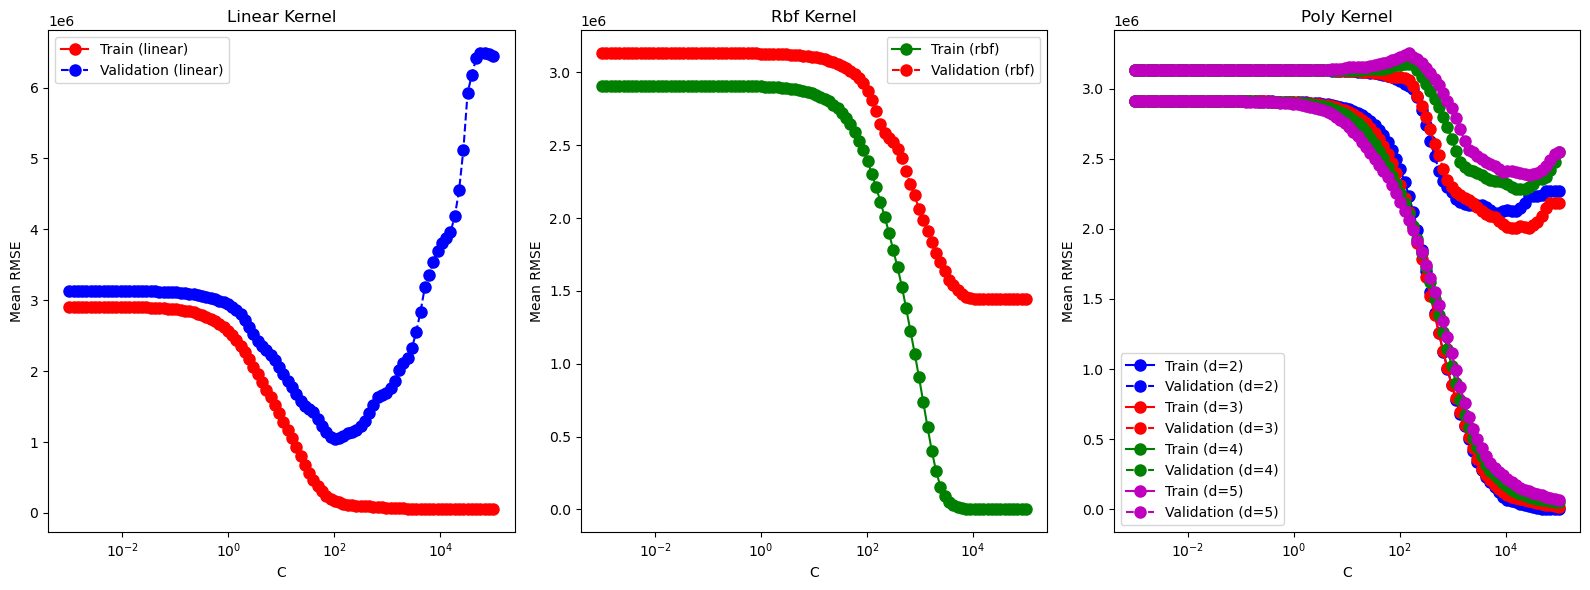

In [35]:

# Plot the mean RMSE values for training and validation data over C for each kernel
kernels = ['linear', 'rbf', 'poly']
colors = ['b', 'r', 'g', 'm']  # Add one more color for the additional degree
degrees = [2, 3, 4, 5]
fig, axs = plt.subplots(1, len(kernels), figsize=(16, 6))

for i, kernel in enumerate(kernels):
    if kernel == 'poly':
        for degree in degrees:
            kernel_means_train = [mean_train for mean_train, params in zip(means_train_svr, params_list_svr) if
                                  params['kernel'] == kernel and params['degree'] == degree]
            kernel_means_test = [mean_test for mean_test, params in zip(means_test_svr, params_list_svr) if
                                 params['kernel'] == kernel and params['degree'] == degree]
            kernel_C_values = [params['C'] for params in params_list_svr if
                               params['kernel'] == kernel and params['degree'] == degree]

            axs[i].plot(kernel_C_values, kernel_means_train, 'o-', label=f'Train (d={degree})', color=colors[degree-2],
                        markersize=8)
            axs[i].plot(kernel_C_values, kernel_means_test, 'o--', label=f'Validation (d={degree})',
                        color=colors[degree-2], markersize=8)
    else:
        kernel_means_train = [mean_train for mean_train, params in zip(means_train_svr, params_list_svr) if
                              params['kernel'] == kernel]
        kernel_means_test = [mean_test for mean_test, params in zip(means_test_svr, params_list_svr) if
                             params['kernel'] == kernel]
        kernel_C_values = [params['C'] for params in params_list_svr if params['kernel'] == kernel]

        axs[i].plot(kernel_C_values, kernel_means_train, 'o-', label='Train (' + kernel + ')', color=colors[i+1],
                    markersize=8)
        axs[i].plot(kernel_C_values, kernel_means_test, 'o--', label='Validation (' + kernel + ')', color=colors[i],
                    markersize=8)

    axs[i].set_xscale('log')
    axs[i].set_xlabel('C')
    axs[i].set_ylabel('Mean RMSE')
    axs[i].set_title(kernel.capitalize() + ' Kernel')
    axs[i].legend()

plt.tight_layout()
plt.show()


<b>Support Vector Regression Observation</b>

From the above values we can observe for Support Vector regressor

- With outliers the fit is perfect, the RMSE for training data is almost zero, but a large value without outliers.
- The test data RMSE remains the same for both the cases.
- R2 for test data is better in the case without outliers which is more important

Hence, The data without outliers seems better than the other case and is considered for further analysis and comparison among other models.

---


## Results

All the further results are shown for the dataset without outliers as they seem to give better fit and lower RMSE values.

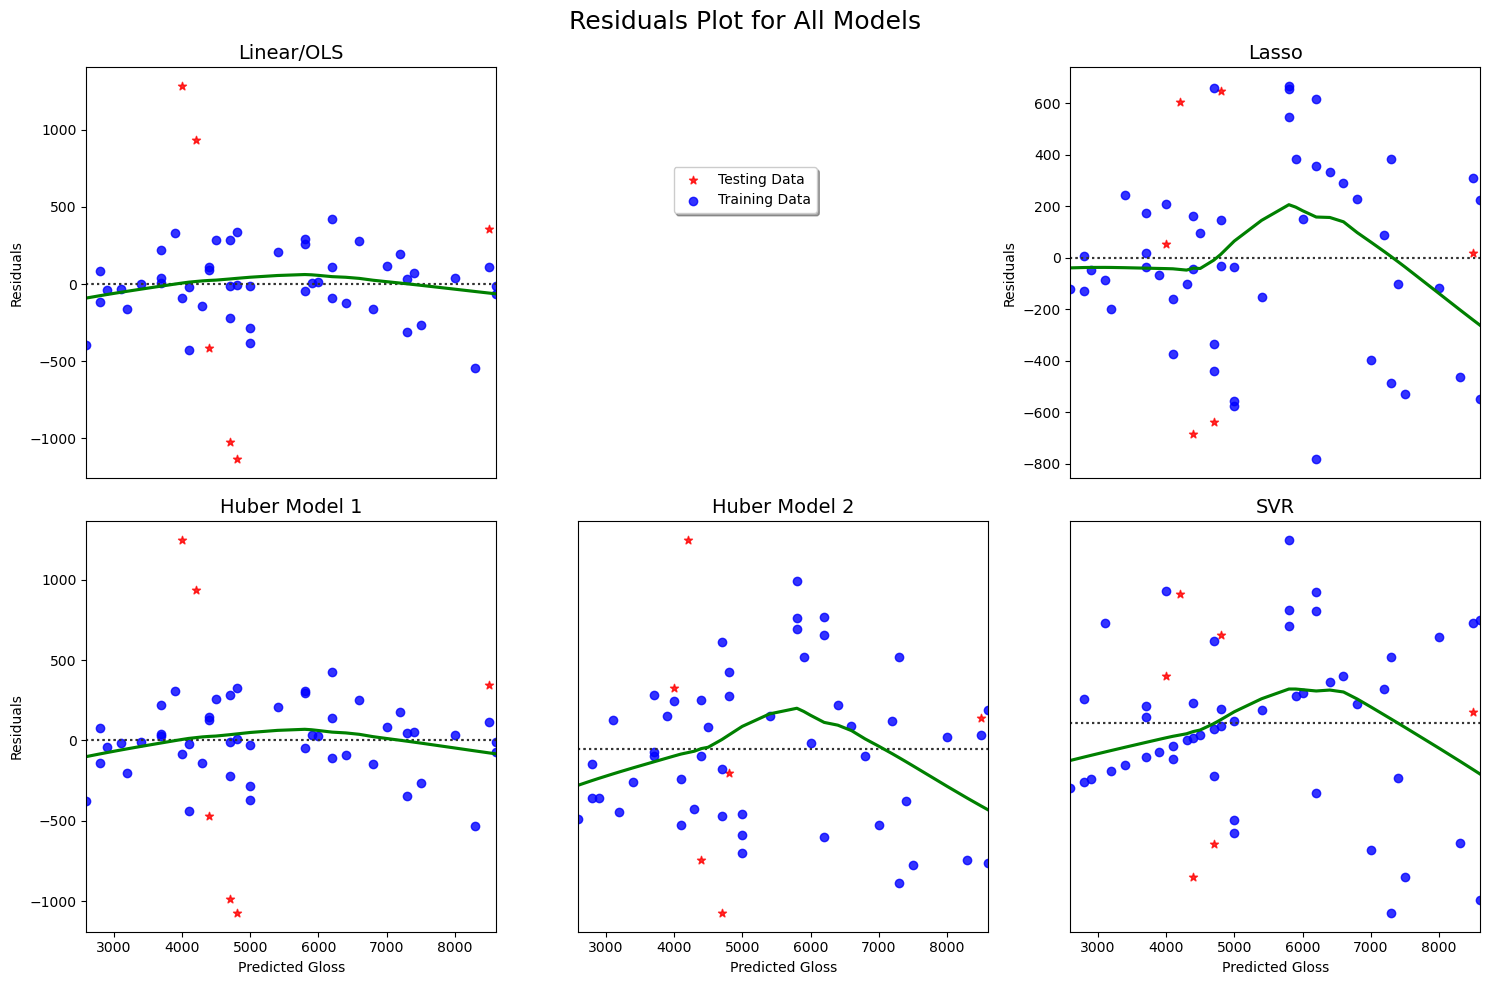

In [36]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Residuals Plot for Linear
sns.residplot(x=y_test, y=y_pred_test_linear, ax=axes[0, 0], label='Testing Data', scatter_kws={"marker": "*", "color": "red"})
sns.residplot(x=y_train, y=y_pred_train_linear, ax=axes[0, 0], lowess=True, line_kws={"color":"g"}, label='Training Data', scatter_kws={"marker": "o", "color": "blue"})
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title("Linear/OLS", fontsize=14)
axes[0, 0].set_xticks([])

# Residuals Plot for Lasso
sns.residplot(x=y_test, y=y_pred_test_lasso, ax=axes[0, 2], label='Testing Data', scatter_kws={"marker": "*", "color": "red"})
sns.residplot(x=y_train, y=y_pred_train_lasso, ax=axes[0, 2], lowess=True, line_kws={"color":"g"}, label='Training Data', scatter_kws={"marker": "o", "color": "blue"})
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title("Lasso", fontsize=14)
axes[0, 2].set_xticks([])
# axes[0, 2].set_yticks([])

# Residuals Plot for Huber Model 1
sns.residplot(x=y_test, y=y_pred_test_huber1, ax=axes[1, 0], label='Testing Data', scatter_kws={"marker": "*", "color": "red"})
sns.residplot(x=y_train, y=y_pred_train_huber1, ax=axes[1, 0], lowess=True, line_kws={"color":"g"}, label='Training Data', scatter_kws={"marker": "o", "color": "blue"})
axes[1, 0].set_xlabel('Predicted Gloss')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title("Huber Model 1", fontsize=14)

# Residuals Plot for Huber Model 2
sns.residplot(x=y_test, y=y_pred_test_huber2, ax=axes[1, 1], label='Testing Data', scatter_kws={"marker": "*", "color": "red"})
sns.residplot(x=y_train, y=y_pred_train_huber2, ax=axes[1, 1], lowess=True, line_kws={"color":"g"}, label='Training Data', scatter_kws={"marker": "o", "color": "blue"})
axes[1, 1].set_xlabel('Predicted Gloss')
# axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title("Huber Model 2", fontsize=14)
axes[1, 1].set_yticks([])

# Residuals Plot for SVR
sns.residplot(x=y_test, y=y_pred_test_svr, ax=axes[1, 2], label='Testing Data', scatter_kws={"marker": "*", "color": "red"})
sns.residplot(x=y_train, y=y_pred_train_svr, ax=axes[1, 2], lowess=True, line_kws={"color":"g"}, label='Training Data', scatter_kws={"marker": "o", "color": "blue"})
axes[1, 2].set_xlabel('Predicted Gloss')
# axes[1, 2].set_ylabel('Residuals')
axes[1, 2].set_title("SVR", fontsize=14)
axes[1, 2].set_yticks([])

# Add more plots to the other subplots
# For example, if you have 5 plots, you can add the next 3 here

# Hide the 2nd empty plot
axes[0, 1].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()         
common_legend = fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 0.8), fancybox=True, shadow=True)

# Adjust layout
plt.suptitle('Residuals Plot for All Models', fontsize=18)
plt.tight_layout()

# Show the combined subplot
plt.show()


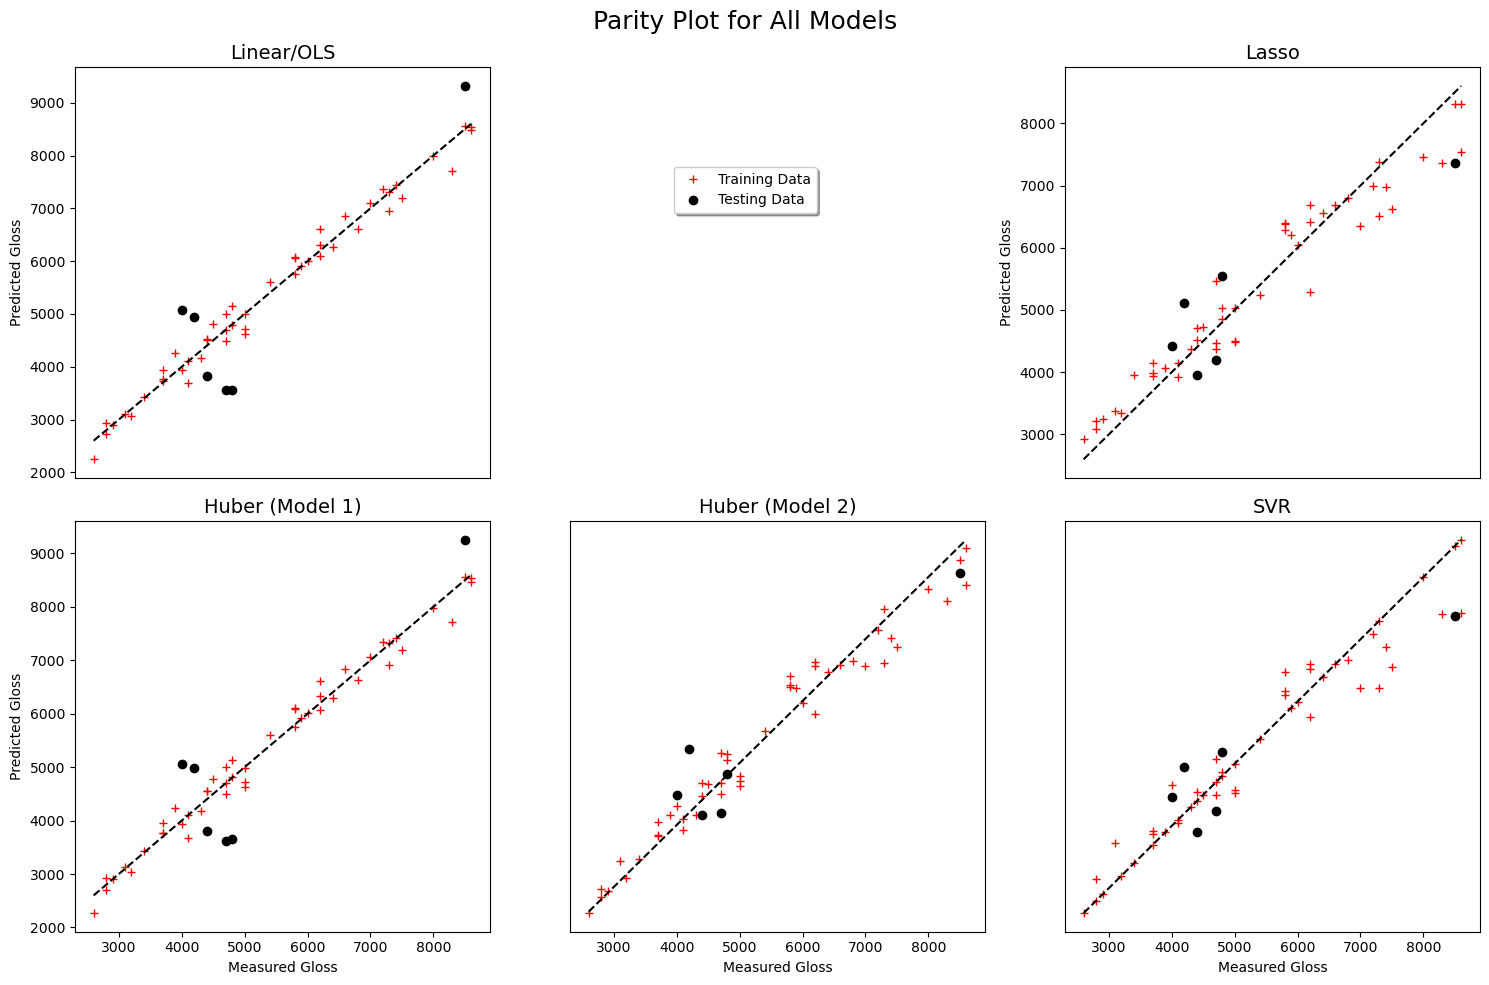

In [37]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Parity Plot for Linear
axes[0, 0].plot(y_train, y_pred_train_linear, '+r', label='Training Data')
axes[0, 0].plot(y_test, y_pred_test_linear, 'ko', label='Testing Data')
axes[0, 0].plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Predicted Gloss')
axes[0, 0].set_title("Linear/OLS", fontsize=14)
axes[0, 0].set_xticks([])
# axes[0, 0].set_yticks([])

# Parity Plot for Lasso
axes[0, 2].plot(y_train, y_pred_train_lasso, '+r', label='train')
axes[0, 2].plot(y_test, y_pred_test_lasso, 'ko', label='test')
axes[0, 2].plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('Predicted Gloss')
axes[0, 2].set_title("Lasso", fontsize=14)
axes[0, 2].set_xticks([])
# axes[0, 2].set_yticks([])

# Parity Plot for Huber Model 1
axes[1, 0].plot(y_train, y_pred_train_huber1, '+r', label='train')
axes[1, 0].plot(y_test, y_pred_test_huber1, 'ko', label='test')
axes[1, 0].plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--')
axes[1, 0].set_xlabel('Measured Gloss')
axes[1, 0].set_ylabel('Predicted Gloss')
axes[1, 0].set_title("Huber (Model 1)", fontsize=14)
# axes[1, 0].set_xticks([])
# axes[1, 0].set_yticks([])

# Parity Plot for Huber Model 2
axes[1, 1].plot(y_train, y_pred_train_huber2, '+r', label='train')
axes[1, 1].plot(y_test, y_pred_test_huber2, 'ko', label='test')
axes[1, 1].plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--')
axes[1, 1].set_xlabel('Measured Gloss')
axes[1, 1].set_ylabel('')
axes[1, 1].set_title("Huber (Model 2)", fontsize=14)
# axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

# Parity Plot for SVR
axes[1, 2].plot(y_train, y_pred_train_svr, '+r', label='train')
axes[1, 2].plot(y_test, y_pred_test_svr, 'ko', label='test')
axes[1, 2].plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--')
axes[1, 2].set_xlabel('Measured Gloss')
axes[1, 2].set_ylabel('')
axes[1, 2].set_title("SVR", fontsize=14)
# axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])

# Add more plots to the other subplots
# For example, if you have 5 plots, you can add the next 3 here

# Hide the 2nd empty plot
axes[0, 1].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()         
common_legend = fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 0.8), fancybox=True, shadow=True)

# Adjust layout
plt.suptitle('Parity Plot for All Models', fontsize=18)
plt.tight_layout()

# Show the combined subplot
plt.show()


In [38]:
r2_train = []
rmse_train = []
for model in ['linear','lasso','huber1','huber2','svr']:
    variable_name = f"y_pred_train_{model}"
    r2_train.append(r2_score(y_train, globals()[variable_name]))
    rmse_train.append(mean_squared_error(y_train, globals()[variable_name], squared=False))
    
r2_test = []
rmse_test = []
for model in ['linear','lasso','huber1','huber2','svr']:
    variable_name = f"y_pred_test_{model}"
    r2_test.append(r2_score(y_test, globals()[variable_name]))
    rmse_test.append(mean_squared_error(y_test, globals()[variable_name], squared=False))
    
index = ['Linear', 'Lasso', 'Huber 1', 'Huber 2', 'SVR']

# Create a DataFrame
results_df = pd.DataFrame({
    'R2_Train': r2_train,
    'R2_Test': r2_test,
    'RMSE_Train': rmse_train,
    'RMSE_Test': rmse_test
}, index=index)

results_df

,R2_Train,R2_Test,RMSE_Train,RMSE_Test
Linear,0.983879,0.615836,213.652464,957.534134
Lasso,0.930527,0.768978,443.524291,742.544357
Huber 1,0.983748,0.639756,214.515159,927.244656
Huber 2,0.963452,0.875992,321.693547,544.028085
SVR,0.942671,0.814970,402.899746,664.534422


In [39]:
# Here we will rank each model for Train and Test data and find a combined rank

ranked_columns = results_df.iloc[:,:2].apply(lambda x: x.rank(ascending=False), axis=0)

# Add the ranks to a new column 'Total_Rank'
results_df['Combined_Rank'] = ranked_columns.sum(axis=1)

# Sort the DataFrame by the 'Total_Rank' column
sorted_df = results_df.sort_values(by='Combined_Rank')
sorted_df

,R2_Train,R2_Test,RMSE_Train,RMSE_Test,Combined_Rank
Huber 2,0.963452,0.875992,321.693547,544.028085,4.0
Linear,0.983879,0.615836,213.652464,957.534134,6.0
Huber 1,0.983748,0.639756,214.515159,927.244656,6.0
SVR,0.942671,0.814970,402.899746,664.534422,6.0
Lasso,0.930527,0.768978,443.524291,742.544357,8.0


- The overall ranking has been calculated with respect to R2 and RMSE for both train and test datasets. The rank in each categorey has been summed up for the total rank.
- Visual understanding can be got from the parity plot, where the Huber 2 model has the best fit of all the models. Because all of the test and training data is closest to the fit line.

From the above final results summary we can see that Huber Model 2 with best epsilon and alpha is best model for our Gloss Optimization Analysis as it is well balanced for both Train and Test data interms of R2 and RMSE.